## Challenge

As mentioned in the Compass, we will be using data from international football (soccer :)) matches that took place between 1872 and 2019 (148 years). You can download the dataset from [**this link**](https://drive.google.com/file/d/1cCn5botBKzh1XZOvrxpcLle-Ua7Fh9BR/view?usp=sharing) and find more information about it on [**Kaggle**](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017).

We need to make sure we understand all variables and information they store before we start working on the task. It's very important to understand the dataset to create meaningful visualizations.

> #### Instruction
> Use visualizations to answer following questions. Try different Python packages.

In [296]:
# import mplot3d
from mpl_toolkits import mplot3d

# import matplotlib
import matplotlib.pyplot as plt

# import plotly graph objects
import plotly.graph_objs as go

# import seaborn
import seaborn as sns

# import pandas
import pandas as pd
import numpy as np

In [3]:
soccer_df= pd.read_csv('data/results.csv')

In [4]:
df= soccer_df.copy()

In [5]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [6]:
df.describe()

,home_score,away_score
count,41586.000000,41586.000000
mean,1.745756,1.187587
std,1.753780,1.405323
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [9]:
# df.index.duplicated().sum()#, 
len(df.index.unique())
# df.info()

41586

In [92]:
# df.tournament.unique()
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3


## Task
Which teams scored the largest number of goals in FIFA World Cup?

In [ ]:
my_filter= df['tournament'] == 'FIFA World Cup'
world_cup_df = df[my_filter]

In [103]:
# split into 2 df - away and home teams with scores

home_team_df = world_cup_df.copy()
home_team_df['team'] = home_team_df['away_team']
# home_team_df[['home_team','home_score']].groupby('home_team').sum()
home_df = home_team_df[['team','home_score']].groupby('team').sum()

In [107]:

away_team_df = world_cup_df.copy()
away_team_df.rename(columns={"away_team":"team"})
away_team_df['team'] = away_team_df['away_team']
# away_team_df[['team','home_score']].groupby('team').sum()
away_df = away_team_df[['team','away_score']].groupby('team').sum()

In [ ]:
# merge 2 df together to get total score
num_goals_df = pd.merge(home_df, away_df, how='outer', on='team')
num_goals_df.head()

In [105]:
num_goals_df['score'] = num_goals_df['home_score'] + num_goals_df['away_score']
num_goals_df.reset_index(inplace=True)

In [203]:

num_goals_df = num_goals_df.sort_values(by='score', ascending=True)

In [204]:
num_goals_df


,level_0,index,team,home_score,away_score,score
6,6,6,Bolivia,1,0,1
1,1,1,Angola,1,1,2
36,36,36,Iraq,2,0,2
69,69,69,Togo,2,1,3
17,17,17,Czech Republic,0,3,3
...,...,...,...,...,...,...
67,67,67,Sweden,47,42,89
37,37,37,Italy,40,56,96
42,42,42,Mexico,67,33,100
76,76,76,Uruguay,48,56,104


### Bar Graph in matplotlib

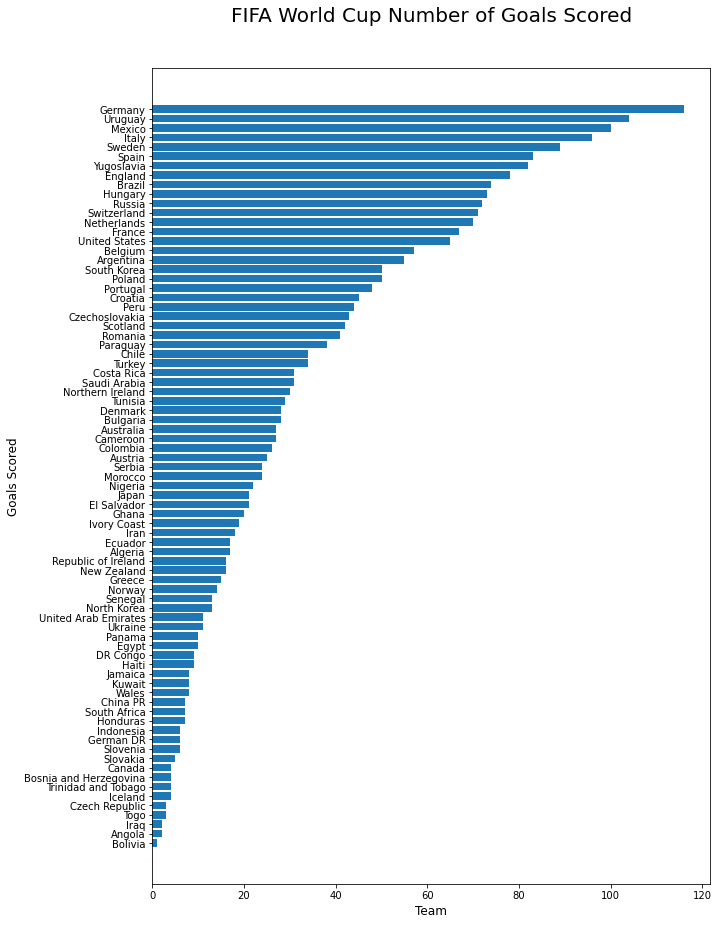

In [207]:
y=num_goals_df.score
x=num_goals_df.team

fig, ax = plt.subplots(figsize = (10,15))

ax.barh(x,y)
ax.set_ylabel('Goals Scored', fontsize=12)
ax.set_xlabel('Team', fontsize=12)
ax.set_title('FIFA World Cup - Total Goals Scored', fontsize=20, y=1.05)

plt.show()

In [94]:
# bar graph (with sum goals FIFA cup)


### With Seaborn

## Task
What is the number of matches played in each tournament throughout history?

In [85]:
tourn_df = df[['tournament','date']].groupby('tournament').count().sort_values('date')
# plot tournatment and date bar

## Task 
Show the trend in number of matches per year.

In [ ]:
# line plot

In [60]:

df.head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876


In [48]:
df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
year          object
dtype: object

### Get year - insert new column

In [209]:
df['date'] = pd.to_datetime(df['date'])

df.year = df.date
df.year = df.year.dt.year

games_year = df[['year', 'date']].groupby('year').count()

In [210]:
games_year.reset_index(inplace=True)

In [211]:
games_year

,year,date
0,1872,1
1,1873,1
2,1874,1
3,1875,1
4,1876,2
...,...,...
144,2016,926
145,2017,958
146,2018,905
147,2019,1155


### Matplotlib

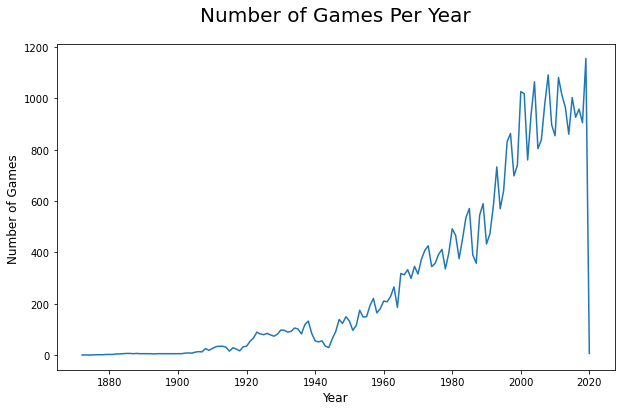

In [214]:
x = games_year.year
y = games_year.date

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(x,y)
ax.set_ylabel('Number of Games ', fontsize=12)
ax.set_xlabel('Year', fontsize=12)

ax.set_title('Number of Games Per Year', fontsize=20, y=1.05)

plt.show()

### in seaborn

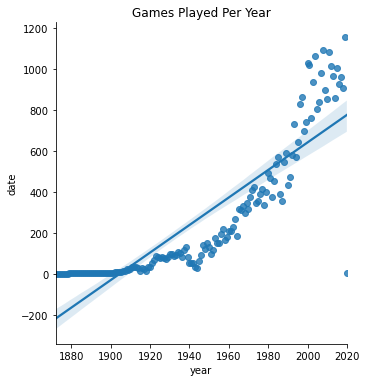

In [383]:
ax = sns.lmplot(x='year', y='date', data = games_year)
ax.set(title='Games Played Per Year')

plt.show()

### In plotly

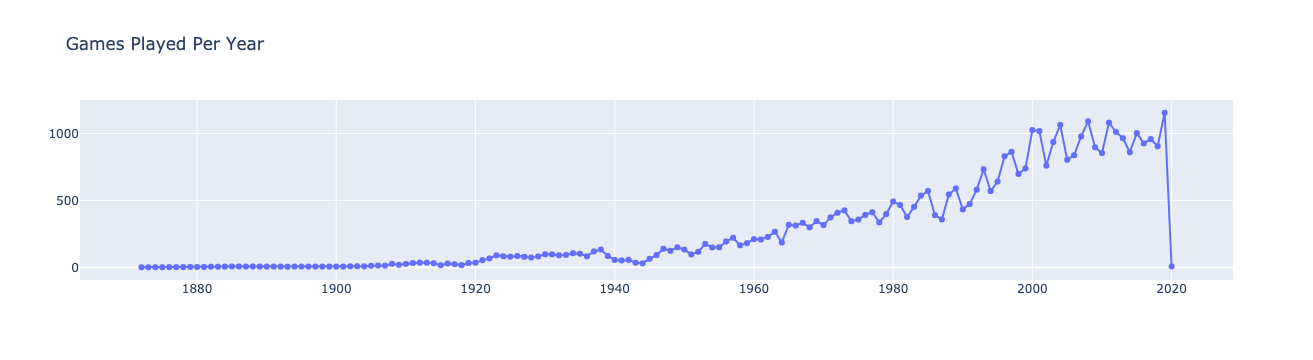

In [388]:
# create traces

trace1 = go.Scatter(
    x = games_year.year,
    y = games_year.date,
    mode = 'lines+markers',
    name = 'lines+markers'
)


# create the data
data = [trace1]  # assign traces to data

# create the layout
layout = go.Layout(
    title = 'Games Played Per Year'
)

# crate the fig
fig = go.Figure(data=data,layout=layout)
fig.show()

## Task
Which teams are the most successful ones? (winning percentage)

In [64]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876


In [234]:
# winning percentage = total games won/ total games played
df_winners = df.copy()
df_winners['winning_team'] = None


In [235]:
df_winners.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,winning_team
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,None
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3,None


#### Calculate the total number of games played by teams

In [236]:
# df_winners.loc[row is the query, column] = reasign

df_winners.loc[(df_winners['away_score'] > df_winners['home_score']), 'winning_team'] = df_winners['away_team'] 
df_winners.loc[(df_winners['home_score'] > df_winners['away_score']), 'winning_team'] = df_winners['home_team'] 

df_winners.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,winning_team
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,None
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3,None
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,Scotland


In [239]:
# idx = np.where((df_winners['away_score'] > df_winners['home_score']))
# idx
# df_winners.loc[idx]

number_home_games = df_winners[['home_team','home_score']].groupby('home_team').count().reset_index().rename(columns={'home_team':'team','home_score': 'num_home_games'})
# number_home_games['team'] = number_home_games['home_team']
# number_home_games['num_home_games'] = number_home_games['home_score']
number_home_games.head(2)


,team,num_home_games
0,Abkhazia,18
1,Afghanistan,40


In [240]:

number_away_games = df_winners[['away_team','away_score']].groupby('away_team').count().reset_index().rename(columns={'away_team':'team','away_score': 'num_away_games'})
# number_away_games['team'] = number_away_games['away_team']
# number_away_games['num_away_games'] = number_away_games['away_score']
number_away_games.head(2)

,team,num_away_games
0,Abkhazia,10
1,Afghanistan,71


In [241]:
total_games = pd.merge(number_home_games, number_away_games, how='outer', on='team')

In [243]:
total_games.head()
total_games['total_games'] = total_games['num_home_games'] + total_games['num_away_games']
total_games.head(2)

,team,num_home_games,num_away_games,total_games
0,Abkhazia,18.0,10.0,28.0
1,Afghanistan,40.0,71.0,111.0


In [244]:
total_games.team.count()

312

In [245]:
total_games.team.nunique()

312

#### Calculate total number of wins

In [246]:
# want teams, total games, total wins
# total_games = df_winners['']
number_wins = df_winners.groupby('winning_team').count()
number_wins.reset_index(inplace=True)
number_wins = number_wins[['winning_team', 'date']]
number_wins = number_wins.rename(columns={'date':'wins', 'winning_team':'team'})

number_wins.nunique()

team    300
wins    163
dtype: int64

In [247]:
number_wins.count()

team    300
wins    300
dtype: int64

#### merge dataframes

In [274]:
success_df = pd.merge(total_games, number_wins, how='left', on='team')

In [254]:
success_df['percent_wins'] = 0

In [275]:
success_df.count()

team              312
num_home_games    308
num_away_games    305
total_games       301
wins              300
dtype: int64

In [276]:
success_df['percent_wins'] = success_df.wins/success_df.total_games

In [281]:
success_df = success_df.sort_values('percent_wins', ascending = False)
success_df.head(10)

,team,num_home_games,num_away_games,total_games,wins,percent_wins
302,Yorkshire,5.0,2.0,7.0,5.0,0.714286
201,Padania,28.0,15.0,43.0,29.0,0.674419
137,Jersey,48.0,34.0,82.0,55.0,0.670732
65,County of Nice,4.0,5.0,9.0,6.0,0.666667
209,Parishes of Jersey,2.0,1.0,3.0,2.0,0.666667
24,Basque Country,32.0,25.0,57.0,37.0,0.649123
35,Brazil,568.0,413.0,981.0,625.0,0.637105
6,Andalusia,12.0,1.0,13.0,8.0,0.615385
220,Rhodes,11.0,7.0,18.0,11.0,0.611111
66,Crimea,1.0,4.0,5.0,3.0,0.600000


### Plot in MatplotLib

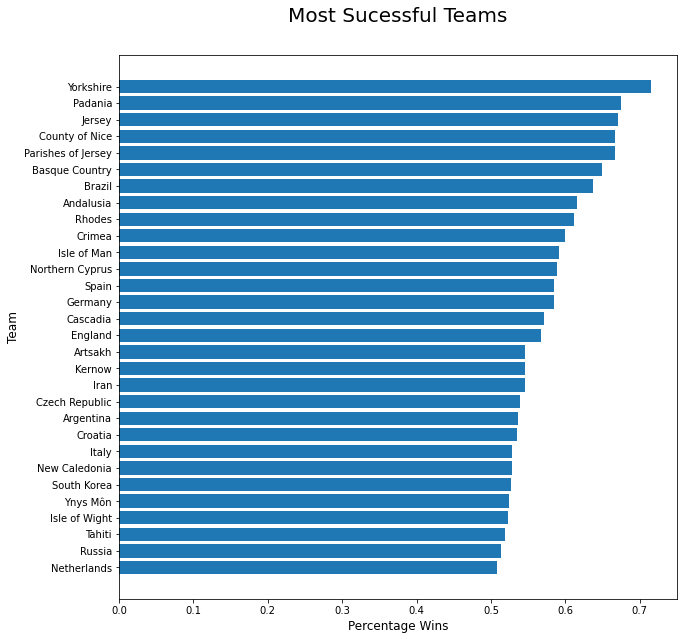

In [283]:
success_plot_df = success_df.sort_values('percent_wins', ascending = False).head(30)
success_plot_df = success_plot_df.sort_values('percent_wins')
y = success_plot_df.percent_wins
x=success_plot_df.team

fig, ax = plt.subplots(figsize = (10,10))

ax.barh(x,y)
ax.set_ylabel('Team', fontsize=12)
ax.set_xlabel('Percentage Wins', fontsize=12)
ax.set_title('Most Sucessful Teams', fontsize=20, y=1.05)

plt.show()

### Plotly

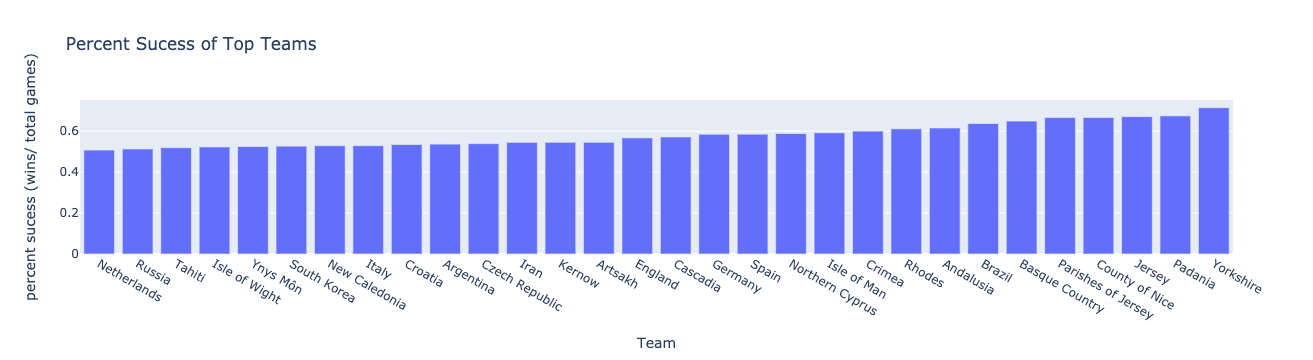

In [391]:
success_plot_df = success_df.sort_values('percent_wins', ascending = False).head(30)
success_plot_df = success_plot_df.sort_values('percent_wins')
y = success_plot_df.percent_wins
x=success_plot_df.team

# create the data
data = [go.Bar(
    x=x,
    y=y
)]

# create the layout
layout = go.Layout(
    title='Percent Sucess of Top Teams',
    xaxis = dict(title = 'Team'), # x-axis label
    yaxis = dict(title = 'percent sucess (wins/ total games)'),
)

# create the figure
fig = go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
# newdf = df.query('origin == "JFK" & carrier == "B6"')
# newdf = df.loc[(df.origin == "JFK") & (df.carrier == "B6")]
# newdf = df[df.origin.isin(["JFK", "LGA"])]

## Task
Which teams are the least successful ones? (winning percentage)

In [ ]:
success_df['percent_wins'] = success_df.wins/success_df.total_games

In [265]:
success_df = success_df.sort_values('percent_wins', ascending = False).head(30)
# success_df.head(2)

,team,num_home_games,num_away_games,total_games,wins,percent_wins
265,São Tomé and Príncipe,21.0,25.0,46.0,8.0,0.173913
139,Kabylia,1.0,5.0,6.0,1.0,0.166667


### Plot in Matplotlib

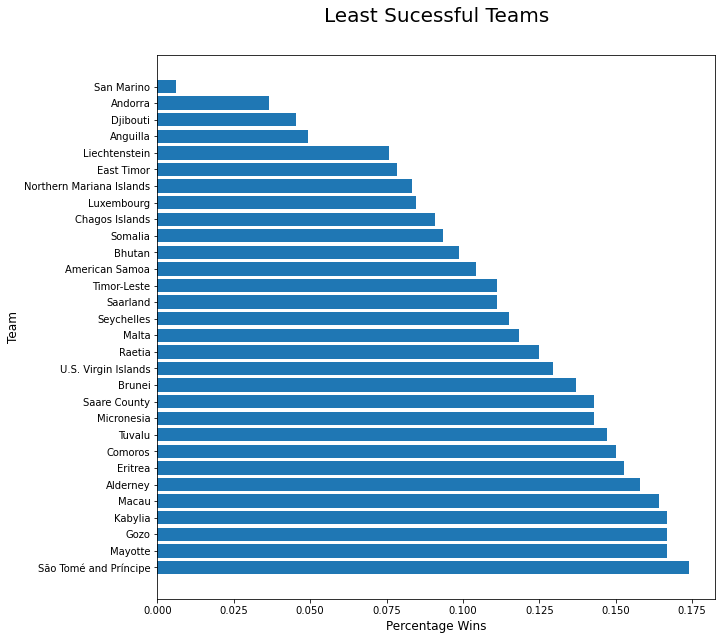

In [286]:
success_df['percent_wins'] = success_df.wins/success_df.total_games
not_success_df = success_df.sort_values('percent_wins').head(30)
not_success_df = not_success_df.sort_values('percent_wins', ascending=False)
y = not_success_df.percent_wins
x=not_success_df.team

fig, ax = plt.subplots(figsize = (10,10))

ax.barh(x,y)
ax.set_ylabel('Team', fontsize=12)
ax.set_xlabel('Percentage Wins', fontsize=12)
ax.set_title('Least Sucessful Teams', fontsize=20, y=1.05)

plt.show()

### Plotly

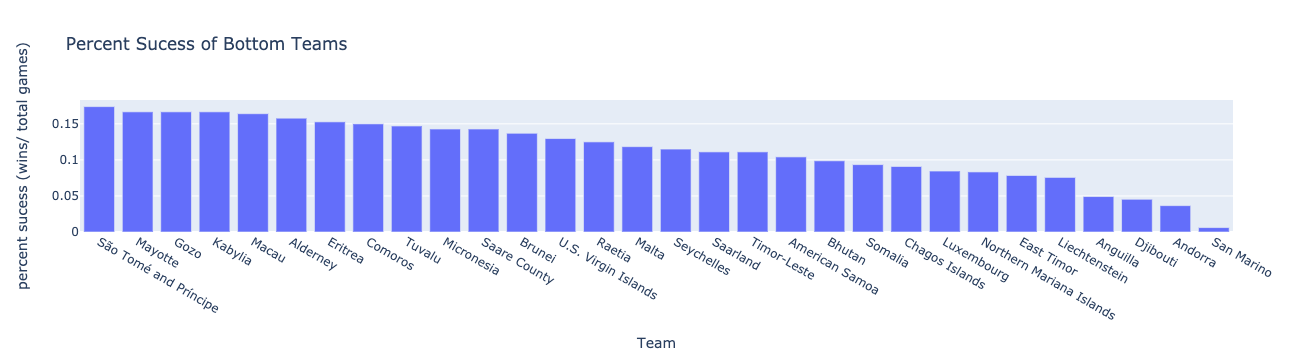

In [392]:
success_df['percent_wins'] = success_df.wins/success_df.total_games
not_success_df = success_df.sort_values('percent_wins').head(30)
not_success_df = not_success_df.sort_values('percent_wins', ascending=False)
y = not_success_df.percent_wins
x=not_success_df.team

# create the data
data = [go.Bar(
    x=x,
    y=y
)]

# create the layout
layout = go.Layout(
    title='Percent Sucess of Bottom Teams',
    xaxis = dict(title = 'Team'), # x-axis label
    yaxis = dict(title = 'percent sucess (wins/ total games)'),
)

# create the figure
fig = go.Figure(data=data, layout=layout)
fig.show()

## Task
Which months through the history had more matches? Is it June, July, or others? Does the number of matches change from month to month?

In [ ]:
# historgram

In [71]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date']
df['month'] = df['month'].dt.month
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3


In [81]:
month_df = df[['month','date']].sort_values('month').groupby('month').count()

In [290]:
month_df.reset_index(inplace=True)
month_df.head(2)

,level_0,index,month,date
0,0,0,1,2218
1,1,1,2,2564


### Plot with Matplotlib

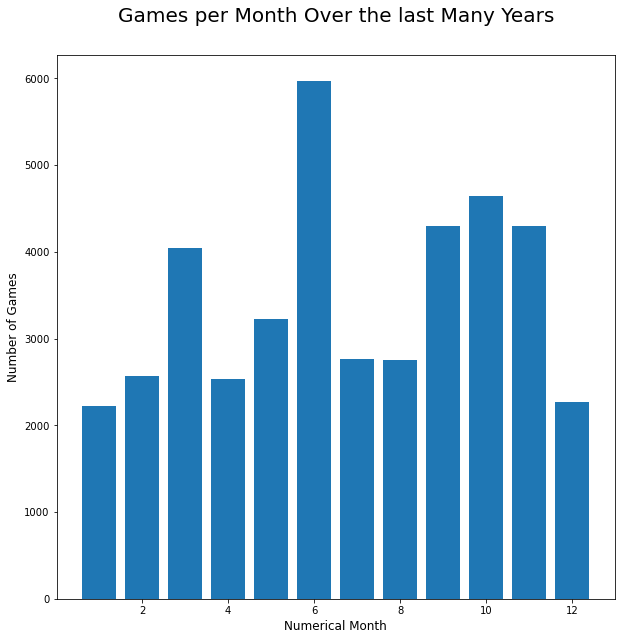

In [294]:
y = month_df.date
x=month_df.month

fig, ax = plt.subplots(figsize = (10,10))

ax.bar(x,y)
ax.set_ylabel('Number of Games', fontsize=12)
ax.set_xlabel('Numerical Month', fontsize=12)
ax.set_title('Games per Month Over the last Many Years', fontsize=20, y=1.05)

plt.show()

### Seaborn

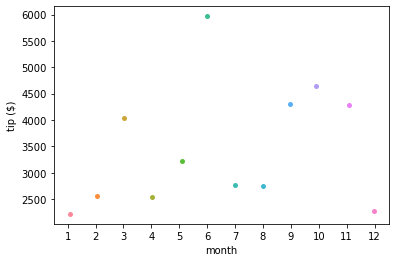

In [384]:
sns.stripplot(x='month',y ='date',data = month_df, size =5, jitter = True)

# overwrite the original y-label from 'tip' to 'tip ($)'
plt.ylabel('tip ($)')
plt.show()

### Plotly

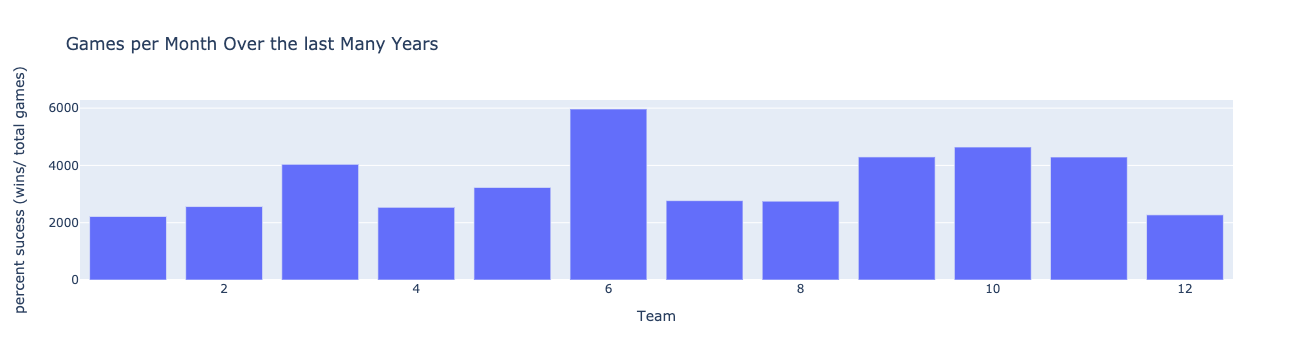

In [393]:
y = month_df.date
x=month_df.month


data = [go.Bar(
    x=x,
    y=y
)]

# create the layout
layout = go.Layout(
    title='Games per Month Over the last Many Years',
    xaxis = dict(title = 'Team'), # x-axis label
    yaxis = dict(title = 'percent sucess (wins/ total games)'),
)

# create the figure
fig = go.Figure(data=data, layout=layout)
fig.show()

## Task
Which teams played against each other the most?

In [83]:
#  or swarm# scatter teams on both sides - or heat map?
df.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3


In [338]:
df2 = df.copy()

In [339]:
df2 = df2[['home_team', 'away_team', 'date']]

In [358]:
df2 = df2.groupby(['home_team', 'away_team']).count()
df2.reset_index(inplace=True)
df2.rename(columns={'date':'as_home_team_count'})
# df2.rename(columns={'date':'as_home_team_count', 'away_team': 'team2', 'home_team': 'team1'})

,home_team,away_team,as_home_team_count
0,Abkhazia,Artsakh,1
1,Abkhazia,Chagos Islands,1
2,Abkhazia,Chameria,1
3,Abkhazia,Kárpátalja,1
4,Abkhazia,Northern Cyprus,1
...,...,...,...
10971,Åland Islands,Jersey,1
10972,Åland Islands,Menorca,1
10973,Åland Islands,Saare County,1
10974,Åland Islands,Shetland,1


In [360]:
df3 = df.copy()
df3 = df3[['away_team', 'home_team', 'date']]
df3 = df3.groupby(['away_team', 'home_team']).count()
df3.reset_index(inplace=True)
df3.rename(columns={'date':'as_away_team_count'})
# df3.rename(columns={'date':'as_away_team_count', 'away_team': 'team1', 'home_team': 'team2'})

,away_team,home_team,as_away_team_count
0,Abkhazia,Artsakh,2
1,Abkhazia,Kabylia,1
2,Abkhazia,Kárpátalja,1
3,Abkhazia,Northern Cyprus,1
4,Abkhazia,Padania,2
...,...,...,...
10971,Åland Islands,Rhodes,1
10972,Åland Islands,Saare County,2
10973,Åland Islands,Shetland,1
10974,Åland Islands,Western Isles,1


In [361]:
a = pd.merge(df2, df3, how='inner', left_on=['home_team', 'away_team'], right_on=['away_team', 'home_team'])

In [365]:
a['team_pair'] = None
a['team_pair'] = a['home_team_x'] + ', ' + a['away_team_x']

In [401]:
a['games_played'] = None
a['games_played'] = a.date_x + a.date_y
# a.head().sort_values(by ='games_played', ascending=False)
# a

,home_team_x,away_team_x,date_x,away_team_y,home_team_y,date_y,team_pair,games_played
0,Abkhazia,Artsakh,1,Abkhazia,Artsakh,2,"Abkhazia, Artsakh",3
1,Abkhazia,Kárpátalja,1,Abkhazia,Kárpátalja,1,"Abkhazia, Kárpátalja",2
2,Abkhazia,Northern Cyprus,1,Abkhazia,Northern Cyprus,1,"Abkhazia, Northern Cyprus",2
3,Abkhazia,Sápmi,1,Abkhazia,Sápmi,2,"Abkhazia, Sápmi",3
4,Afghanistan,Bangladesh,1,Afghanistan,Bangladesh,4,"Afghanistan, Bangladesh",5
...,...,...,...,...,...,...,...,...
8331,Åland Islands,Isle of Wight,1,Åland Islands,Isle of Wight,1,"Åland Islands, Isle of Wight",2
8332,Åland Islands,Jersey,1,Åland Islands,Jersey,4,"Åland Islands, Jersey",5
8333,Åland Islands,Saare County,1,Åland Islands,Saare County,2,"Åland Islands, Saare County",3
8334,Åland Islands,Shetland,1,Åland Islands,Shetland,1,"Åland Islands, Shetland",2


In [368]:
b= a[['team_pair', 'games_played']]

In [379]:
c = b.sort_values('games_played', ascending = False).head(20)

### Matplotlib

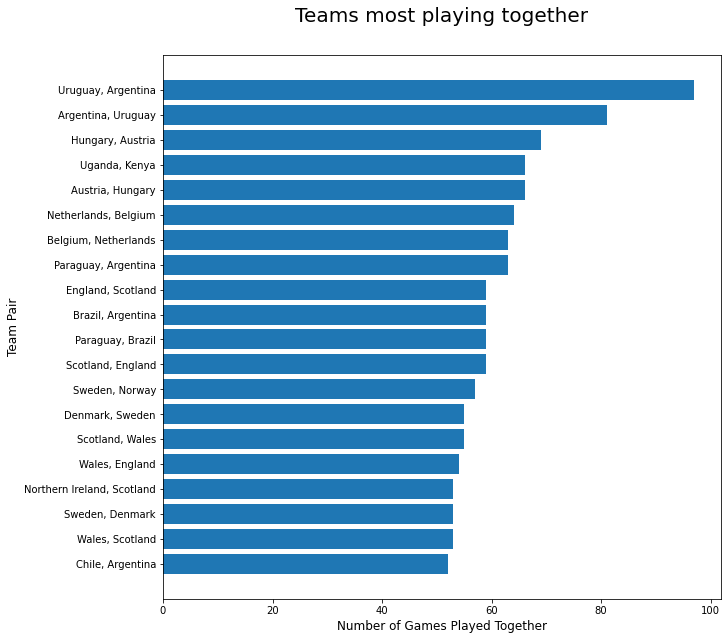

In [381]:
c = c.sort_values('games_played')
x_values = c.team_pair
y_values = c.games_played

fig, ax = plt.subplots(figsize = (10,10))

ax.barh(x_values,y_values)
ax.set_xlabel('Number of Games Played Together', fontsize=12)
ax.set_ylabel('Team Pair', fontsize=12)
ax.set_title('Teams most playing together', fontsize=20, y=1.05)

plt.show()
# ax = sns.lmplot(x='home_team', y='away_team', data = df)
# ax.set(title='Teams that play togther')

# plt.show()

### Plotly

In [ ]:
# use map to diplay number of wins over time on world
# add interactive slider to show ...

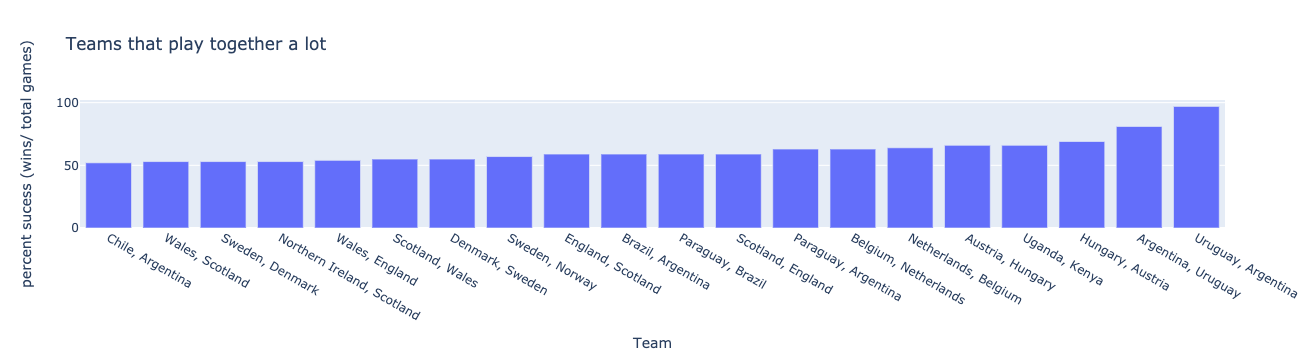

In [396]:
c = c.sort_values('games_played')
x = c.team_pair
y = c.games_played


data = [go.Bar(
    x=x,
    y=y
)]

# create the layout
layout = go.Layout(
    title='Teams that play together a lot',
    xaxis = dict(title = 'Team'), # x-axis label
    yaxis = dict(title = 'percent sucess (wins/ total games)'),
)

# create the figure
fig = go.Figure(data=data, layout=layout)
fig.show()

## Task
Apply your creativity to show some additional insights from the data.

## Task (Stretch)
Create these graphs in Tableau as well.

In [ ]:
# bwhahahaha